In [1]:
import sys
sys.path.append('./../../')

import ikamoana
from ikamoana.ikafish.behaviours import AllKernels
from ikamoana.utils.configfilegenerator import ConfigFileGenerator

from typing import Dict, Tuple, List
import numpy as np
import pandas as pd
import xarray as xr

---
# The user must specify this informations

### Directories

In [2]:
working_dir = "/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/"

forcing_dir = working_dir+"ikamoana_data/"
start_distribution = working_dir+"ikamoana_data/"
seapodym_file = (working_dir
                 + "SEAPODYM_data/run-test/data/po_freeglorys_0.25x30d_1998_2019/"
                   "skj_ref2018_freeglorys_reanalysis_025x30d_vgpm_Fref.xml")

### Domain

In [3]:
dt          : float = 1
# start     : str   = ""
sim_time    : float = 30
output_dt   : float = 30
lat_min     : float = -40
lat_max     : float = 50
lon_min     : float = 120
lon_max     : float = 290

### Cohort Info

In [4]:
# start_length        : float = 0
ageing              : bool  = True
number_of_cohorts   : int   = 1000

## Chose the one you want to use and leave other as None ------------- #
# Dynamic
start_dynamic_file  : str   = None
file_extension      : str   = "nc"

# Static
start_static_file   : str   = None

# Tag release
start_cell_lon      : float = 180
start_cell_lat      : float = 10
## ------------------------------------------------------------------- #

### Mortality
> If you don't want to use fishing mortality, set `use_mortality` to `False`.

In [5]:
use_mortality = False

fishery_dict    : Dict[str,str] = {}
skiprows        : int           = 0
predict_effort  : bool          = False

### Forcing

In [6]:
files_only                  : bool  = False
home_directory              : bool  = ""
files_dict                  : Dict[str, Tuple[bool, str]] = {
    # All the files you want to add, empty otherwise.
}

correct_epi_temp_with_vld   : bool  = True
landmask_from_habitat       : bool  = False
shallow_sea_to_ocean        : bool  = False
indonesian_filter           : bool  = True
vertical_movement           : bool  = True
diffusion_boost             : float = 0
diffusion_scale             : float = 1
c_scale                     : float = 1
taxis_scale                 : float = 1
units                       : str   = "m_per_s"
field_interp_method         : str   = "nearest"

### Kernels

In [7]:
kernels_list: List[str] = [
    # All the kernels you want to add.
    'CalcLonLatScalers',
    'IkAdvectionRK4',
    'TaxisRK4',
    'RandomWalkNonUniformDiffusion',
    'IkaDimMoveWithDiffusionReroll',
    'LandBlock'
]

---

In [8]:
my_simulations_list = pd.read_csv("../../data/ikamoana_data/SKJ_TagSim_PopSimsList.csv")
my_simulations_list = my_simulations_list[:1]
my_simulations_list

,Year,Quarter,Cohort,date
0,2006,Q3,30.72,2006-08-15


In [9]:
for i in my_simulations_list[["Cohort", "date"]].itertuples():
    length = i[1]
    date = i[2]
    name = "ika_sim_Length_{}_Date_{}".format(str(length).replace(".","_"),
                                  str(date).replace("-","_"))
    
    cfg = ConfigFileGenerator(name,"")
    cfg.directories(forcing_dir, start_distribution, seapodym_file)
    cfg.domain(dt, date, sim_time, output_dt, lat_min, lat_max, lon_min, lon_max)
    cfg.cohortInfo(length, ageing, number_of_cohorts, start_dynamic_file,
                   file_extension, start_static_file, start_cell_lon, start_cell_lat)
    if use_mortality :
        cfg.mortality(fishery_dict, skiprows, predict_effort)
    cfg.forcing(files_dict, files_only, home_directory, correct_epi_temp_with_vld,
                landmask_from_habitat, shallow_sea_to_ocean, indonesian_filter,
                vertical_movement, diffusion_boost, diffusion_scale, c_scale,
                taxis_scale, units, field_interp_method)
    cfg.kernels(kernels_list)
    cfg.write(name)
    
    

---
> Try with one of these files.

In [10]:
tmp = ikamoana.IkaSeapodym("./ika_sim_Length_30_72_Date_2006_08_15.xml")
tmp.loadFields()

 It will also add +1 to sigma_min. Cf. function documentation for more details.


/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/notebook/CONFIG_GENERATOR/./../../ikamoana/feedinghabitat/feedinghabitat.py:348: RuntimeWarning: overflow encountered in power
  1.0 / (1.0 + (np.power(gamma,(variable - o_star)))),
/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/notebook/CONFIG_GENERATOR/./../../ikamoana/feedinghabitat/feedinghabitat.py:348: RuntimeWarning: overflow encountered in power
  1.0 / (1.0 + (np.power(gamma,(variable - o_star)))),


In [11]:
tmp.initializeParticleSet(particles_class=ikamoana.IkaFish)
tmp.runKernels()

INFO: Compiled ArrayIkaFishCalcLonLatScalersIkAdvectionRK4TaxisRK4RandomWalkNonUniformDiffusionIkaDimMoveWithDiffusionRerollLandBlock ==> /tmp/parcels-1000/lib9d63d9422873852018662f1292c2fdae_0.so


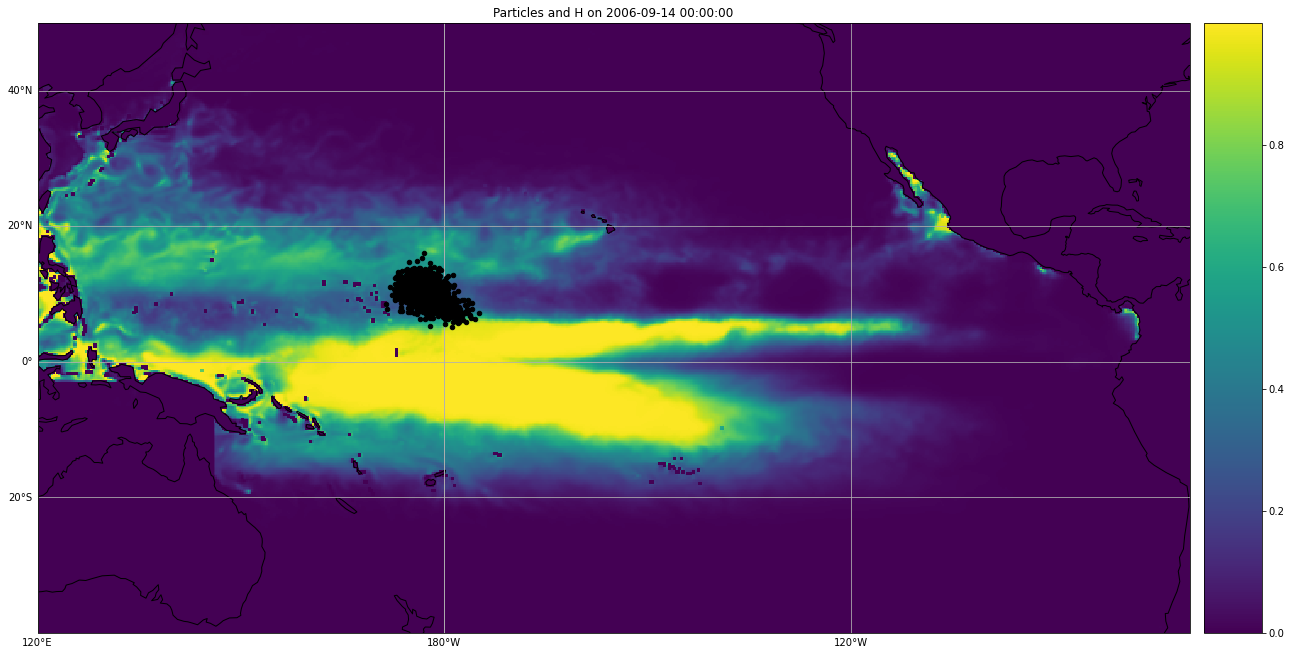

In [12]:
tmp.fish.show(field=tmp.ocean.H)